## 逻辑回归 

### 参数设置
- X, 样本数据, shape=(m,n),type:np.ndarray()
- y, 标签数据, shape=(m,1),type:np.ndarray()
- theta, 权重, shape=(1,n),type:np.ndarray()
- b, 偏差，标量, type:float

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [180]:
class LogisticRegression(object):
    def __init__(self, learning_rate=0.01, epochs=1000, is_regularization = None, lam=0.1,
                verbose = False):
        """
        :type learning_rate: float, 学习率
        :type epochs: int, 迭代次数
        :type is_regularization: int, None: 不使用正则化，l1: L1正则化，l2: L2正则化
        :type lam: 正则化项的系数
        """
        self.alpha = learning_rate
        self.epochs = epochs
        self.is_regularization = is_regularization
        self.lam = lam
        self.theta = None
        self.b = None
        self.verbose = verbose
    def train(self, train_x, train_y):
        m , n = train_x.shape
        if len(train_y.shape) == 1:
            train_y = train_y.reshape(-1, 1)
        self.theta = np.random.randn(1 ,n)
        self.b = np.random.randn()
        
        for i in range(self.epochs):
            pre_y = self.predict(train_x)
#             print pre_y.shape, train_y.shape
            d_theta = np.mean((pre_y - train_y)*train_x, axis=0).reshape(*self.theta.shape)
            d_b     = np.mean(pre_y - train_y, axis=0)
#             print d_theta.shape
            # L1 正则
            if self.is_regularization == 'l1':
                d_l1 = np.ones_like(self.theta)
                d_l1[self.theta < 0] = -1
                d_theta += self.lam * d_l1
            # L2 正则
            elif self.is_regularization == 'l2':
                d_theta += self.lam * self.theta
            
            self.theta -= self.alpha * d_theta
            self.b     -= self.alpha * d_b
            if self.verbose is True and (i+1)%(m/10) == 0:
                print 'the %d train' % (i)
    
    def fit(self, train_x, train_y):
        self.train(train_x, train_y)
        
    def predict(self, test_x):
        return self.sigmoid(np.dot(test_x, self.theta.T)+self.b)
        
    def output(self, test_x):
        return (self.sigmoid(np.dot(test_x, self.theta.T)+self.b) > 0.5).astype(int)
    
    def sigmoid(self, x):
        return 1.0 / (np.exp(-x)+1)

In [19]:
def load_data():
    digits = datasets.load_digits()
    X, y = digits.data, digits.target
    X = StandardScaler().fit_transform(X)

    # classify small against large digits
    y = (y > 4).astype(np.int)
    return X,y

In [198]:
def logisticRegression(X, y):
    for i, lam in enumerate((3, 6, 9)):
        # turn down tolerance for short training time
        clf_l1_LR = LogisticRegression(learning_rate=0.2, epochs=11000, 
                                       is_regularization='l1', lam=lam, verbose=False)
        clf_l2_LR = LogisticRegression(learning_rate=0.2, epochs=11000, 
                                       is_regularization='l2', lam=lam, verbose=False)
        clf_l1_LR.fit(X, y)
        clf_l2_LR.fit(X, y)

        coef_l1_LR = clf_l1_LR.theta.ravel()
        coef_l2_LR = clf_l2_LR.theta.ravel()

        # coef_l1_LR contains zeros due to the
        # L1 sparsity inducing norm

        sparsity_l1_LR = np.sum(coef_l1_LR == 0)
        sparsity_l2_LR = np.sum(coef_l2_LR == 0)
        
        clf_l1_pre_y = clf_l1_LR.output(X)
        clf_l2_pre_y = clf_l2_LR.output(X)

        print("lam=%f" % lam)
        print("Sparsity with L1 penalty: %d" % sparsity_l1_LR)
        print("score with L1 penalty: %f" % accuracy_score(clf_l1_pre_y, y))
        print("Sparsity with L2 penalty: %d" % sparsity_l2_LR)
        print("score with L2 penalty: %f" % accuracy_score(clf_l2_pre_y, y)) 

        plt.figure(figsize=(12, 7))
        l1_plot = plt.subplot(3, 2, 2 * i + 1)
        l2_plot = plt.subplot(3, 2, 2 * (i + 1))
        if i == 0:
            l1_plot.set_title("L1 penalty")
            l2_plot.set_title("L2 penalty")

        l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                       cmap='binary', vmax=1, vmin=0)
        l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                       cmap='binary', vmax=1, vmin=0)
        plt.text(-8, 3, "lam = %f" % lam)

        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l2_plot.set_xticks(())
        l2_plot.set_yticks(())

In [190]:
X, y = load_data()

lam=3.000000
Sparsity with L1 penalty: 0
score with L1 penalty: 0.514747
Sparsity with L2 penalty: 3
score with L2 penalty: 0.847524
lam=6.000000
Sparsity with L1 penalty: 0
score with L1 penalty: 0.513077
Sparsity with L2 penalty: 3
score with L2 penalty: 0.835838
lam=9.000000
Sparsity with L1 penalty: 0
score with L1 penalty: 0.671119
Sparsity with L2 penalty: 0
score with L2 penalty: 0.454090


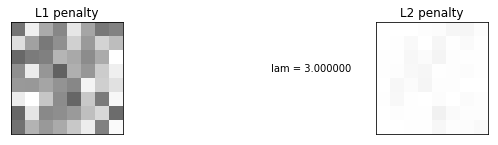

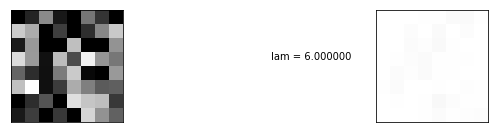

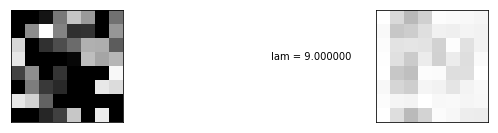

In [199]:
logisticRegression(X, y)

### 实现一个one-vs-all的多类别分类器 

In [16]:
def load_data(path = "../data/mnist", kind = 'train', one_hot = True, normals = True):
    images, labels = load_mnist(path, kind=kind)
    if normals == True:
        images = images / 255.0
    if one_hot == True:
        labels_onehot = np.zeros((labels.shape[0], np.unique(labels).shape[0]))
        for i in range(labels_onehot.shape[0]):
            labels_onehot[i][labels[i]] = 1
        labels = labels_onehot
    return (images, labels)

(60000, 784) (60000, 10)


In [15]:
def logisticRegression(train_x, train_y, test_x, test_y):
    # Turn up tolerance for faster convergence
    
    clf = LogisticRegression(learning_rate=0.01, epochs=1000, 
                             is_regularization='l1', lam=0.1)
    clf.fit(train_x, train_y)
    sparsity = np.mean(clf.theta == 0) * 100
    pre_y = clf.predict(test_x)
    score = clf.score(pre_y, test_y)
    # print('Best C % .4f' % clf.C_)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity)
    print("Test score with L1 penalty: %.4f" % score)

    coef = clf.theta.copy()
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l1_plot.set_xlabel('Class %i' % i)
    plt.suptitle('Classification vector for...')

In [ ]:
train_x, train_y = load_data(kind='train')
test_x, test_y = load_data(kind='t10k')
print train_x.shape, train_y.shape